In [1]:
import numpy as np
import music21 as ms
import os

ModuleNotFoundError: No module named 'music21'

In [20]:
environment.set('musescoreDirectPNGPath', "C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe")

In [17]:
os.chdir('Music-Generation')
print(os.getcwd())

C:\Users\cjgra\Documents\Github\Music-Generation


In [18]:
import musicautobot.numpy_encode as numpy_encode
from importlib import reload
reload(numpy_encode)
from musicautobot.numpy_encode import *

In [11]:
os.chdir('testing')

In [23]:
print(os.getcwd())

C:\Users\cjgra\Documents\GitHub\Music-Generation


In [24]:
configure.run()


______________________________________________________________________________ 
  
Welcome to the music21 Configuration Assistant. You will be guided through a 
number of questions to install and set up music21. Simply pressing return at a 
prompt will select a default, if available. 

You may run this configuration again at a later time by running 
music21/configure.py. 
  
______________________________________________________________________________ 
  
Defining an XML Reader permits automatically opening music21-generated 
MusicXML in an editor for display and manipulation when calling the show() 
method. Setting this option is highly recommended. 
  
[1] C:\Program Files\MuseScore 4\bin\MuseScore4.exe 
  
Choose a number from the preceding options (default is 1): 


MusicXML Reader set to: C:\Program Files\MuseScore 4\bin\MuseScore4.exe 
  
______________________________________________________________________________ 
  
The BSD-licensed music21 software is distributed with a corpus of encoded 
compositions which are distributed with the permission of the encoders (and, 
where needed, the composers or arrangers) and where permitted under United 
States copyright law. Some encodings included in the corpus may not be used 
for commercial uses or have other restrictions: please see the licenses 
embedded in individual compositions or directories for more details. 
  
In addition to the corpus distributed with music21, other pieces are not 
included in this distribution, but are indexed as links to other web sites 
where they can be downloaded (the "virtual corpus"). If you would like, 
music21 can help your computer automatically resolve these links and bring 
them to your hard drive for analysis. 
To the best of our knowledge, the music (if not th


Auto Download set to: allow 
  
______________________________________________________________________________ 
  
Would you like to send a pre-formatted email to music21 regarding your 
installation? Installation reports help us make music21 work better for you: 
Enter Yes or No (default is Yes): 


______________________________________________________________________________ 
  
The music21 discussion group provides a forum for asking questions and getting 
help. Would you like to see the music21 discussion list or sign up for 
updates? Enter Yes or No (default is Yes): 

 no



______________________________________________________________________________ 
  
Would you like to view the music21 documentation in a web browser? Enter Yes 
or No (default is Yes): 

 no



______________________________________________________________________________ 
  
The music21 Configuration Assistant is complete. Press return to continue. 

In [15]:
from music21 import environment
env = environment.Environment()
env["musescoreDirectPNGPath"] = "C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe"  # Adjust if your path is different
env.write()

In [29]:
# This notebook contains tests for the functions in numpy_encode
# These should work, as I only updated the usage of "flat" to "flatten()"
# as flat has been depricated in new versions of music21
stream = file2stream('testing/mary.mid')

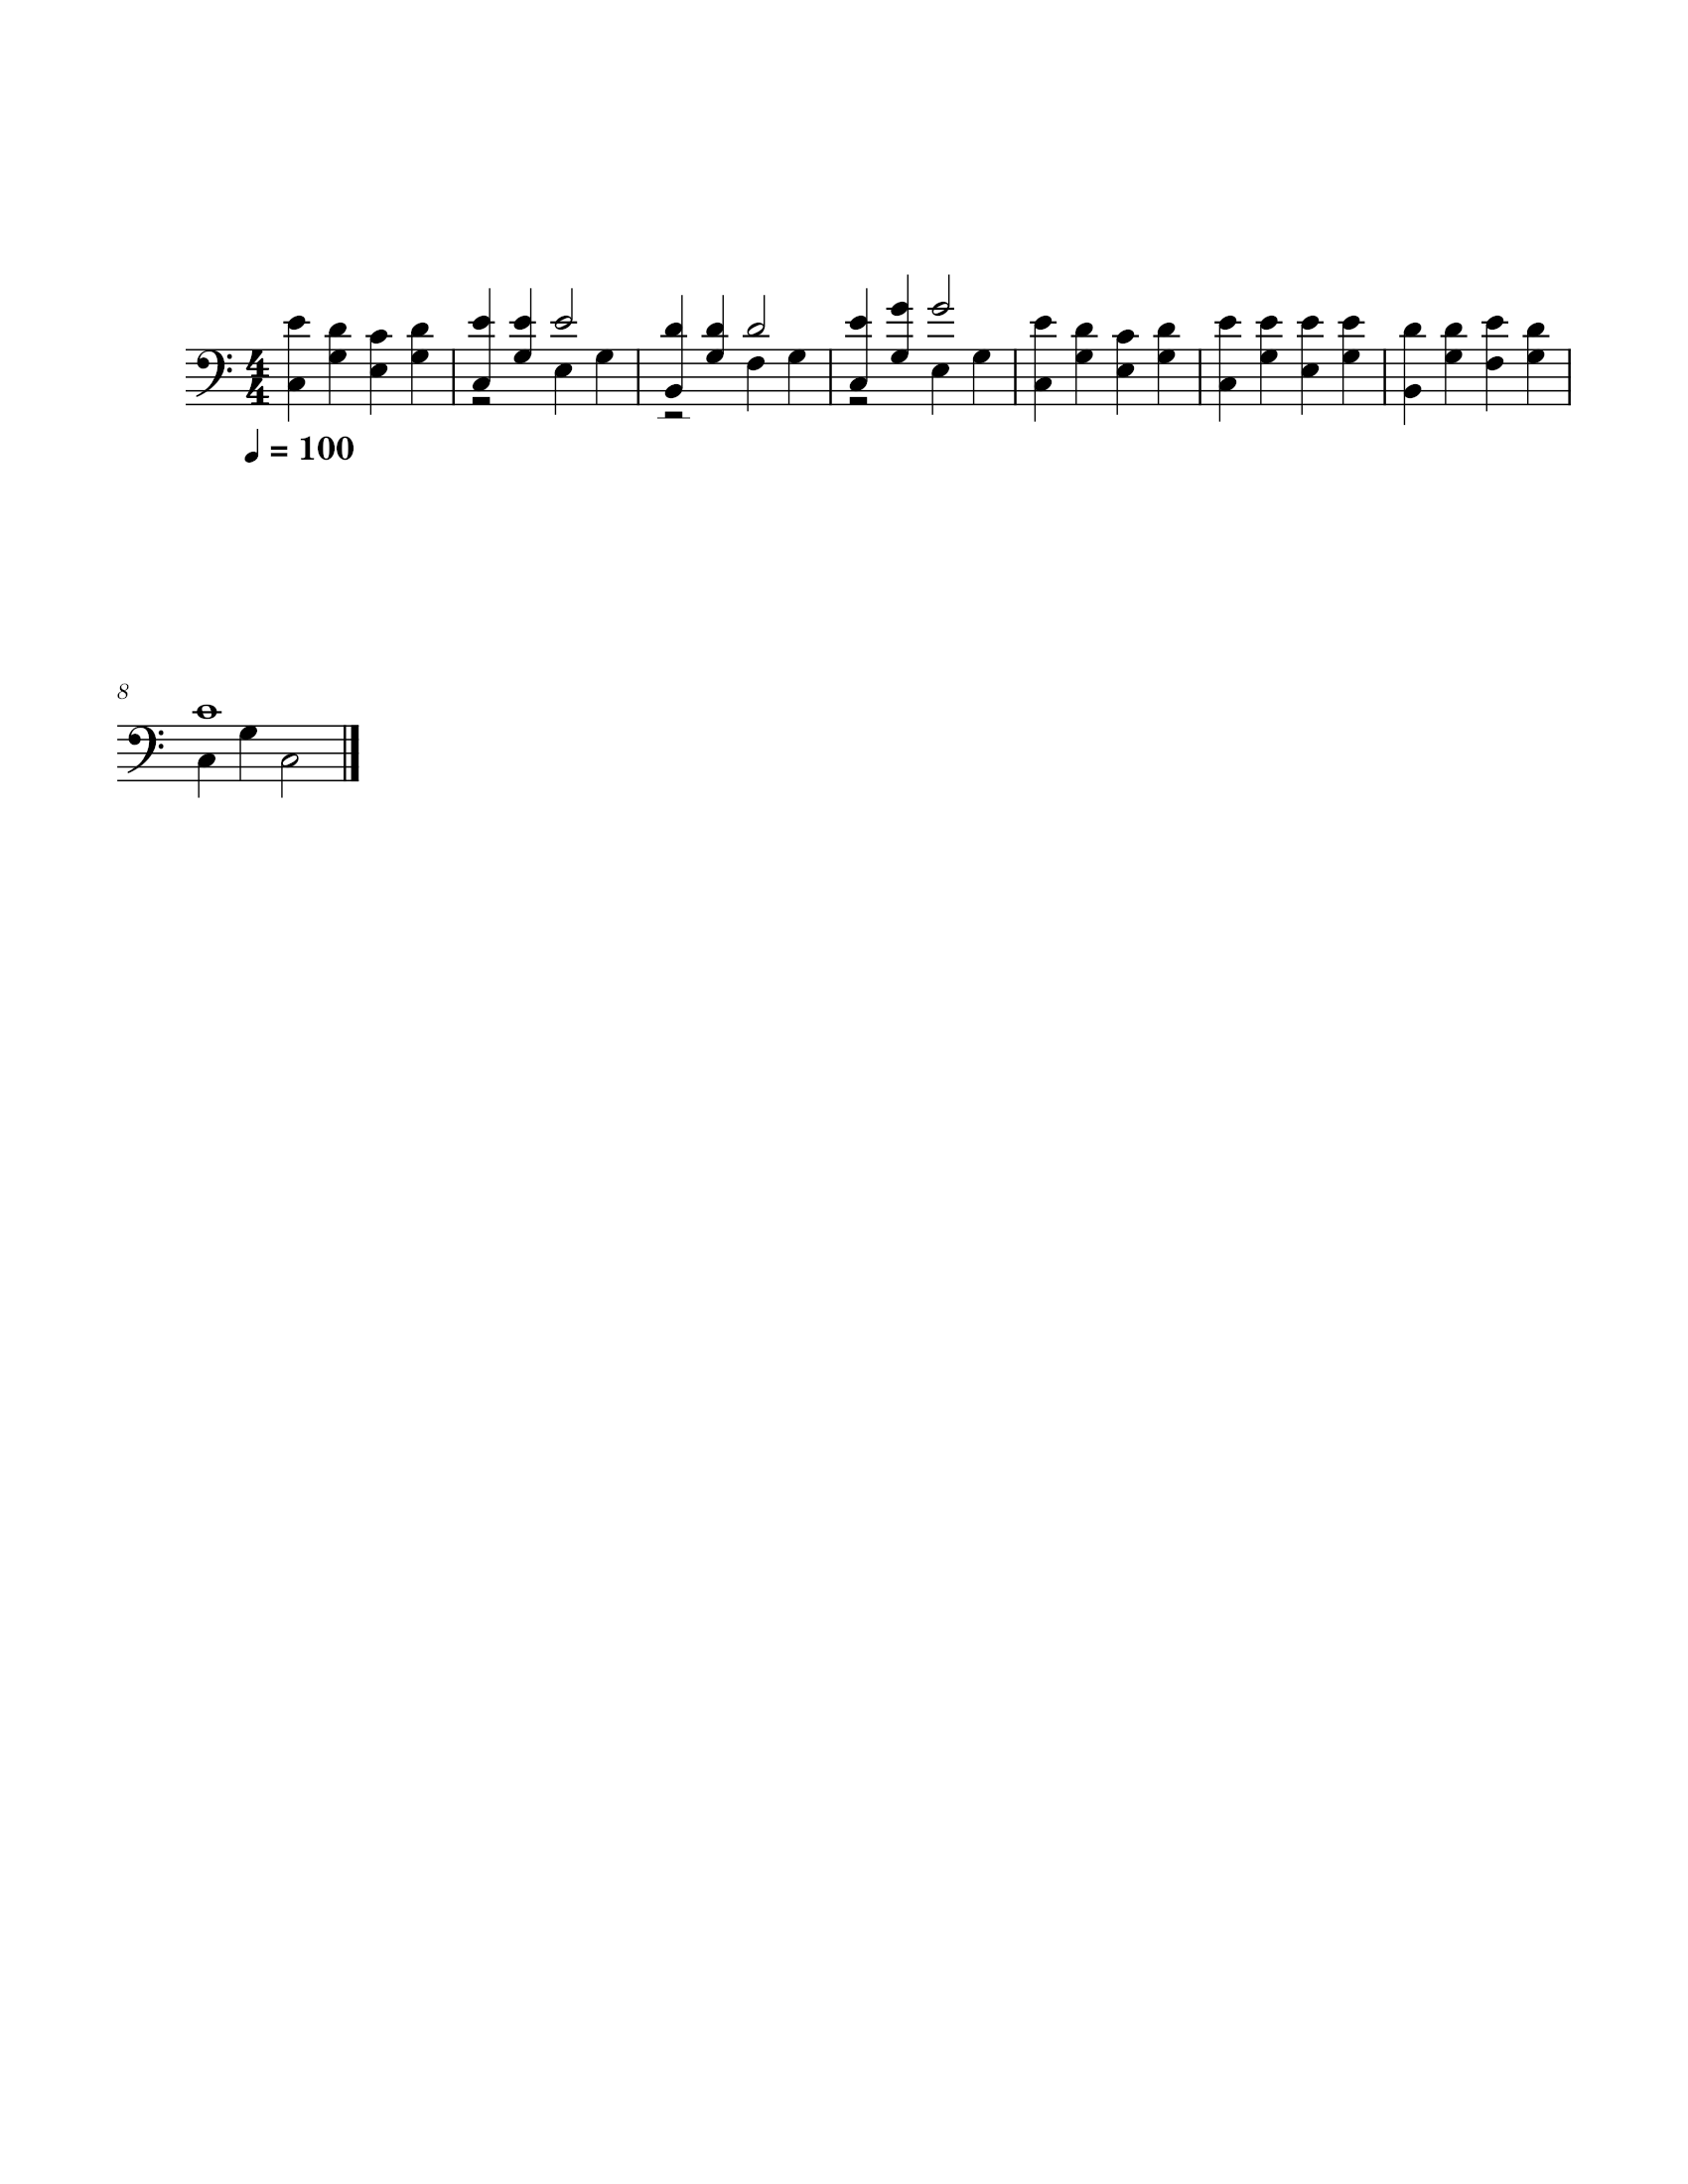

In [30]:
stream.show()

In my testing of midi files so far, a few issues, at least with the display of the files has come up. 
- #1 There are repeated tempo markings, some of which contain decimals. This could be due to ritardo or accelerando. 
- #2 It does not seperate voices, as you can see, there are multiple voices listed in the same staff

In [37]:
chordarr = stream2chordarr(stream)

In [40]:
# This should return a TimeSteps x Parts x # of Pitches
chordarr.shape
# in this case, our sampling frequency is 4, but we can change it if we want to by passing a different value

(129, 1, 128)

In [53]:
# For example
chordarr2 = stream2chordarr(stream, sample_freq = 8)
chordarr2.shape
# This will result in more time steps, and thus a higher 
# "definition" of the music

(257, 1, 128)

In [56]:
# This creates a dense array, where each value is 
# [pitch, dur] 
# -1 is a break, that is, each 
npenc = chordarr2npenc(chordarr)
npenc

array([[64,  4],
       [48,  4],
       [-1,  4],
       [62,  4],
       [55,  4],
       [-1,  4],
       [60,  4],
       [52,  4],
       [-1,  4],
       [62,  4],
       [55,  4],
       [-1,  4],
       [64,  4],
       [48,  4],
       [-1,  4],
       [64,  4],
       [55,  4],
       [-1,  4],
       [64,  8],
       [52,  4],
       [-1,  4],
       [55,  4],
       [-1,  4],
       [62,  4],
       [47,  4],
       [-1,  4],
       [62,  4],
       [55,  4],
       [-1,  4],
       [62,  8],
       [53,  4],
       [-1,  4],
       [55,  4],
       [-1,  4],
       [64,  4],
       [48,  4],
       [-1,  4],
       [67,  4],
       [55,  4],
       [-1,  4],
       [67,  8],
       [52,  4],
       [-1,  4],
       [55,  4],
       [-1,  4],
       [64,  4],
       [48,  4],
       [-1,  4],
       [62,  4],
       [55,  4],
       [-1,  4],
       [60,  4],
       [52,  4],
       [-1,  4],
       [62,  4],
       [55,  4],
       [-1,  4],
       [64,  4],
       [48,  4

In [43]:
from musicautobot.numpy_encode import *
from musicautobot.music_transformer import *
from musicautobot.vocab import *
from musicautobot.music_transformer.transform import *

In [40]:
midi_file = os.path.abspath('testing/numpy_encode/mary.mid')

In [41]:
vocab = MusicVocab.create()

In [44]:
item = MusicItem.from_file(midi_file, vocab)

C:\Users\cjgra\Documents\Github\Music-Generation\musicautobot\numpy_encode.py:48: StreamIteratorInefficientWarning: highestTime is not defined on StreamIterators. Call .stream() first for efficiency
  highest_time = max(s.flatten().getElementsByClass('Note').highestTime, s.flatten().getElementsByClass('Chord').highestTime)


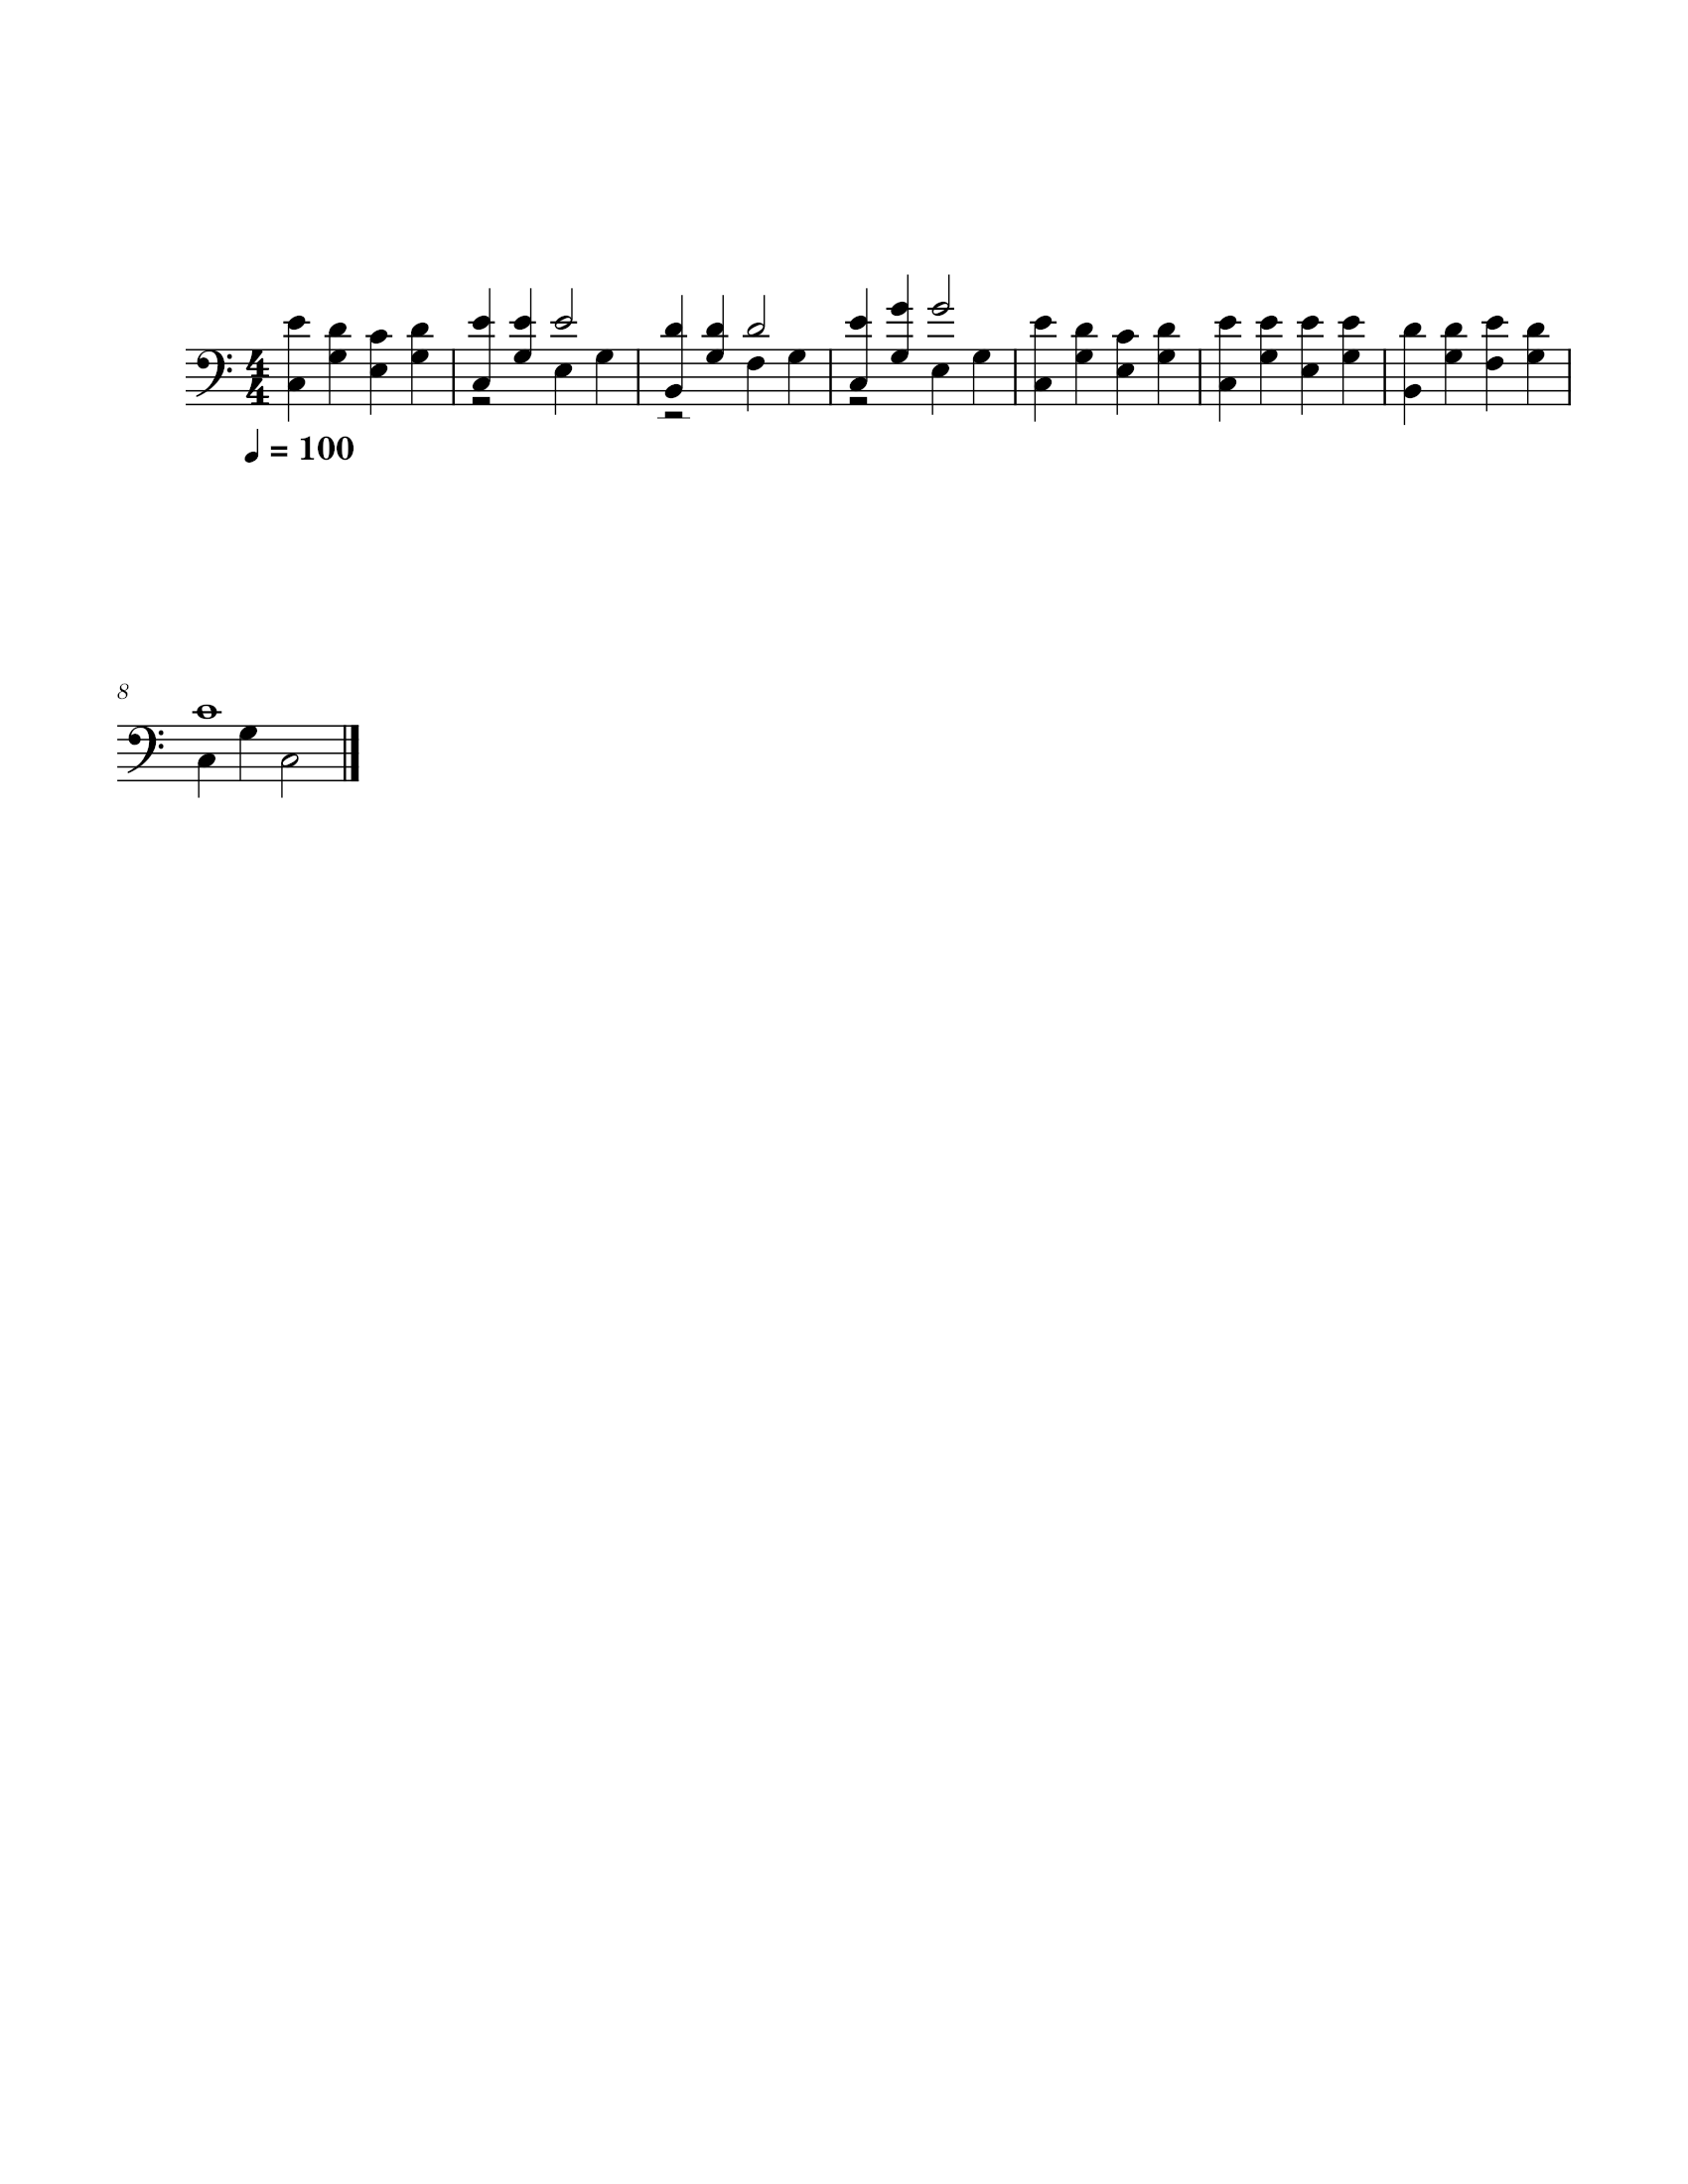

In [45]:
item.show()

In [46]:
item.to_text()

'xxbos xxpad n64 d4 n48 d4 xxsep d4 n62 d4 n55 d4 xxsep d4 n60 d4 n52 d4 xxsep d4 n62 d4 n55 d4 xxsep d4 n64 d4 n48 d4 xxsep d4 n64 d4 n55 d4 xxsep d4 n64 d8 n52 d4 xxsep d4 n55 d4 xxsep d4 n62 d4 n47 d4 xxsep d4 n62 d4 n55 d4 xxsep d4 n62 d8 n53 d4 xxsep d4 n55 d4 xxsep d4 n64 d4 n48 d4 xxsep d4 n67 d4 n55 d4 xxsep d4 n67 d8 n52 d4 xxsep d4 n55 d4 xxsep d4 n64 d4 n48 d4 xxsep d4 n62 d4 n55 d4 xxsep d4 n60 d4 n52 d4 xxsep d4 n62 d4 n55 d4 xxsep d4 n64 d4 n48 d4 xxsep d4 n64 d4 n55 d4 xxsep d4 n64 d4 n52 d4 xxsep d4 n64 d4 n55 d4 xxsep d4 n62 d4 n47 d4 xxsep d4 n62 d4 n55 d4 xxsep d4 n64 d4 n53 d4 xxsep d4 n62 d4 n55 d4 xxsep d4 n60 d16 n48 d4 xxsep d4 n55 d4 xxsep d4 n48 d8'

In [50]:
item.to_tensor()

tensor([  0,   1,  73, 141,  57, 141,   8, 141,  71, 141,  64, 141,   8, 141,
         69, 141,  61, 141,   8, 141,  71, 141,  64, 141,   8, 141,  73, 141,
         57, 141,   8, 141,  73, 141,  64, 141,   8, 141,  73, 145,  61, 141,
          8, 141,  64, 141,   8, 141,  71, 141,  56, 141,   8, 141,  71, 141,
         64, 141,   8, 141,  71, 145,  62, 141,   8, 141,  64, 141,   8, 141,
         73, 141,  57, 141,   8, 141,  76, 141,  64, 141,   8, 141,  76, 145,
         61, 141,   8, 141,  64, 141,   8, 141,  73, 141,  57, 141,   8, 141,
         71, 141,  64, 141,   8, 141,  69, 141,  61, 141,   8, 141,  71, 141,
         64, 141,   8, 141,  73, 141,  57, 141,   8, 141,  73, 141,  64, 141,
          8, 141,  73, 141,  61, 141,   8, 141,  73, 141,  64, 141,   8, 141,
         71, 141,  56, 141,   8, 141,  71, 141,  64, 141,   8, 141,  73, 141,
         62, 141,   8, 141,  71, 141,  64, 141,   8, 141,  69, 153,  57, 141,
          8, 141,  64, 141,   8, 141,  57, 145])